
# About Dataset

Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

1.  Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
2. Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

* ApplicationDate: Loan application date
* Age: Applicant's age
* AnnualIncome: Yearly income
* CreditScore: Creditworthiness score
* EmploymentStatus: Job situation
* EducationLevel: Highest education attained
* Experience: Work experience
* LoanAmount: Requested loan size
* LoanDuration: Loan repayment period
* MaritalStatus: Applicant's marital state
* NumberOfDependents: Number of dependents
* HomeOwnershipStatus: Homeownership type
* MonthlyDebtPayments: Monthly debt obligations
* CreditCardUtilizationRate: Credit card usage percentage
* NumberOfOpenCreditLines: Active credit lines
* NumberOfCreditInquiries: Credit checks count
* DebtToIncomeRatio: Debt to income proportion
* BankruptcyHistory: Bankruptcy records
* LoanPurpose: Reason for loan
* PreviousLoanDefaults: Prior loan defaults
* PaymentHistory: Past payment behavior
* LengthOfCreditHistory: Credit history duration
* SavingsAccountBalance: Savings account amount
* CheckingAccountBalance: Checking account funds
* TotalAssets: Total owned assets
* TotalLiabilities: Total owed debts
* MonthlyIncome: Income per month
* UtilityBillsPaymentHistory: Utility payment record
* JobTenure: Job duration
* NetWorth: Total financial worth
* BaseInterestRate: Starting interest rate
* InterestRate: Applied interest rate
* MonthlyLoanPayment: Monthly loan payment
* TotalDebtToIncomeRatio: Total debt against income
* LoanApproved: Loan approval status
* RiskScore: Risk assessment score


## Libraries

In [65]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
#-------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

## Data

In [66]:
df=pd.read_csv('Loan - Loan.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


# Basic Understand

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [68]:
df.isnull()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770758,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [70]:
df.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,
2072-09-17,40,61052,652,Unemployed,Master,18,10865,36,Single,0,Other,368,0.175566,1,1,0.149769,0,Education,0,22,10,1638,154,50505,39376,5087.666667,0.867487,6,11129,0.169865,0.145219,374.100069,0.145863,1,36.8,1
2072-09-16,30,34815,597,Employed,Associate,8,18470,12,Married,1,Mortgage,304,0.184220,0,1,0.170138,0,Debt Consolidation,0,27,5,3090,390,162331,9443,2901.250000,0.841803,7,152888,0.184970,0.170399,1684.901343,0.685533,0,48.0,1
2072-09-15,46,83731,489,Employed,Bachelor,23,16914,36,Single,1,Own,318,0.243314,3,1,0.196291,0,Debt Consolidation,0,26,14,4659,105,44633,5305,6977.583333,0.729449,5,39328,0.257414,0.227990,652.965834,0.139155,1,39.2,1
2072-09-14,51,80555,617,Self-Employed,Master,30,20307,12,Single,5,Own,814,0.085830,3,1,0.064931,0,Auto,0,26,23,608,1132,113378,2448,6712.916667,0.832470,5,110930,0.176807,0.160829,1843.267942,0.395844,1,35.2,1
2072-09-13,43,62750,613,Employed,Doctorate,22,11941,12,Single,2,Rent,314,0.595555,5,0,0.211039,0,Debt Consolidation,0,29,9,547,142,176479,19739,5229.166667,0.920463,5,156740,0.170441,0.181449,1095.574647,0.269560,1,37.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0,1
2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1
2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1


In [71]:
df.shape

(20000, 36)

In [72]:
print(f'The loan approval dataset has{df.shape[0]}occurences {df.shape[1]}feature!')

The loan approval dataset has20000occurences 36feature!


In [73]:
print('The feature of the Dataset are:')
features = len(df.columns)
features_list = [feature for feature in df.columns]
for feature in features_list:
  print(feature)

The feature of the Dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


#  **Data** **visualizations**

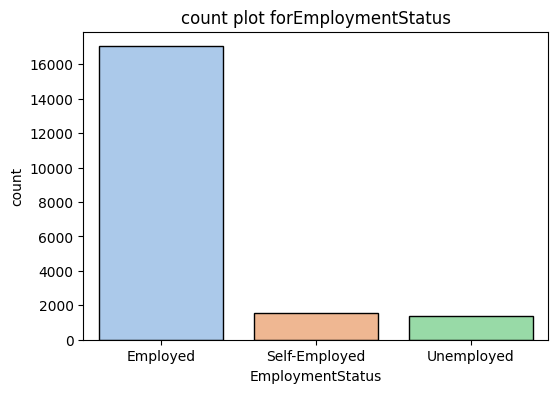

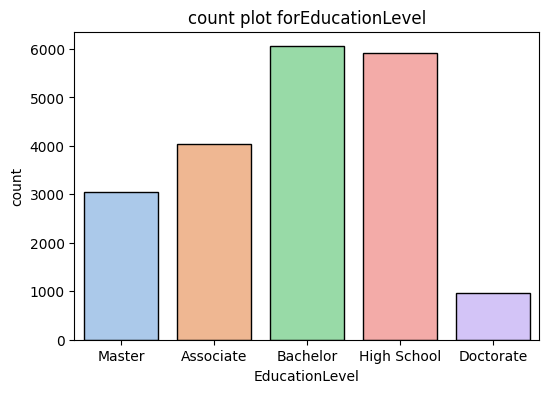

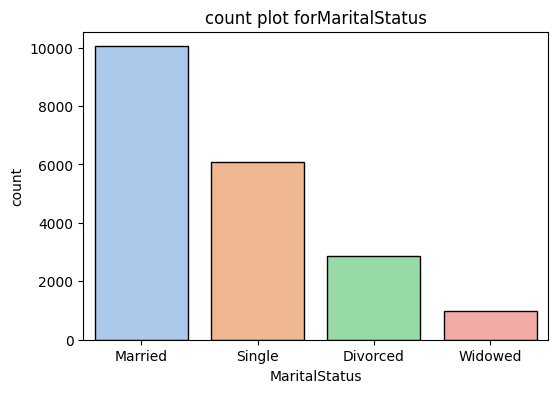

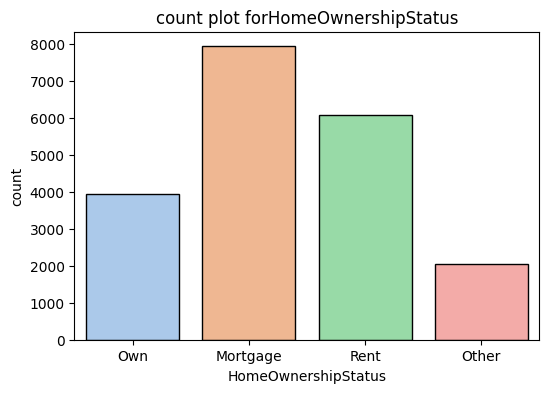

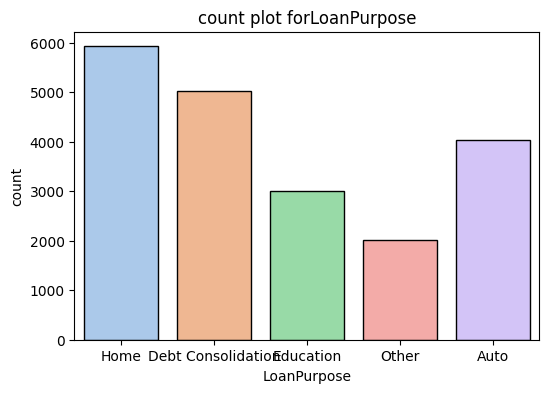

In [74]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]:
 plt.figure(figsize=(6, 4))
 sns.countplot(data=df, x=col, hue=col, palette='pastel',edgecolor='k')
 plt.title(f'count plot for{col}')
 plt.show()

infernce
* Employed
* Married  
* comparatively less educated
* need loan for building home.

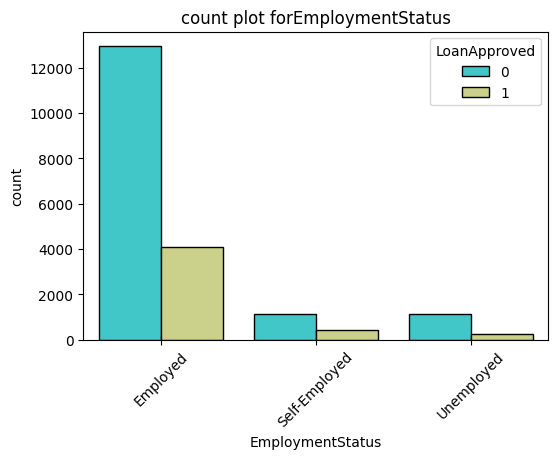

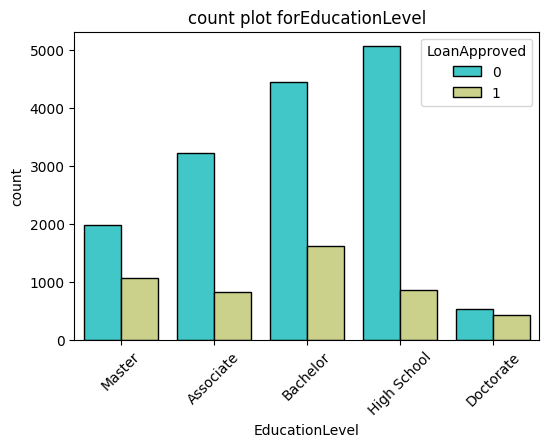

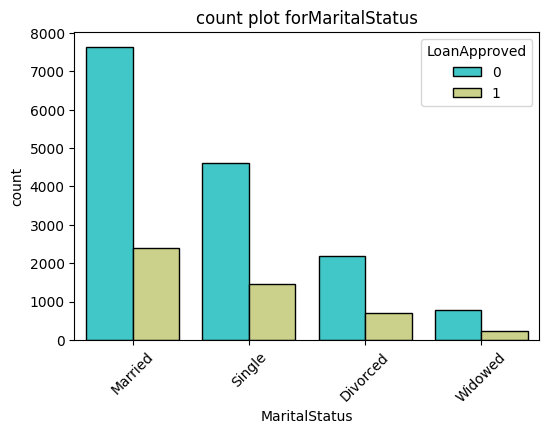

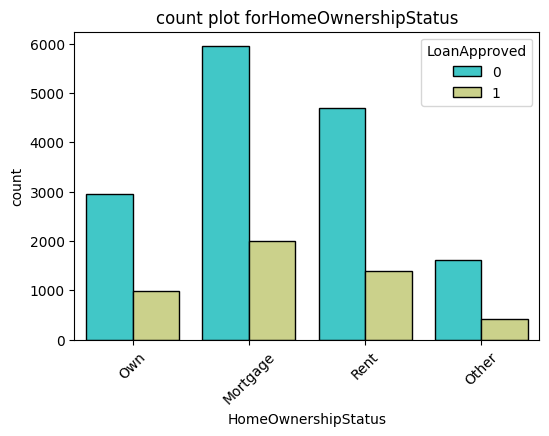

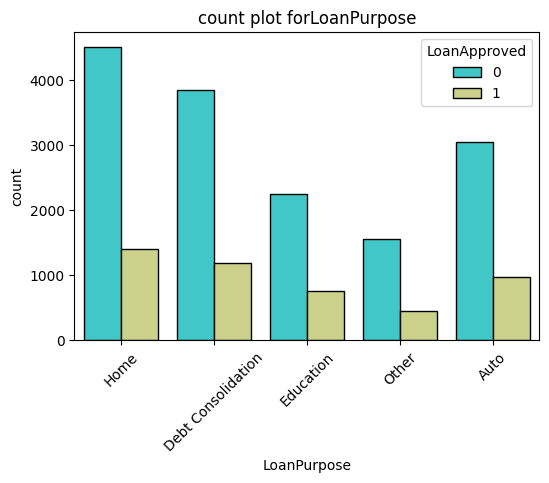

In [75]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]:
 plt.figure(figsize=(6, 4))
 sns.countplot(data=df, x=col,palette='rainbow',edgecolor='k',hue='LoanApproved')
 plt.title(f'count plot for{col}')
 plt.xlabel(col)
 plt.ylabel('count')
 plt.xticks(rotation=45)
 plt.show()

mojority of loan requests are rejected in all categories(there might be some  other raeson affecting the riskscore).

## numerical columns


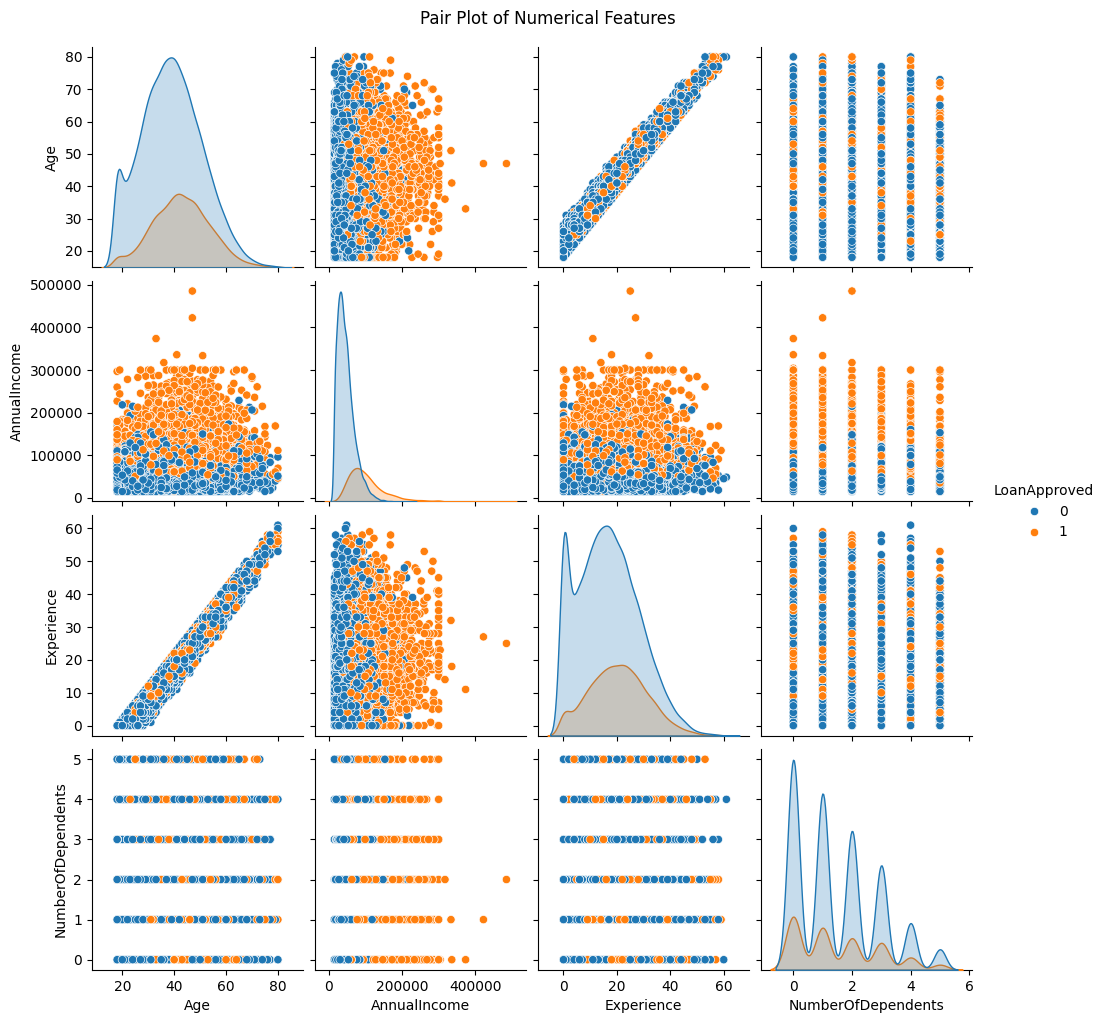

In [76]:
sns.pairplot(df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']],hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features',y=1.02)
plt.show()

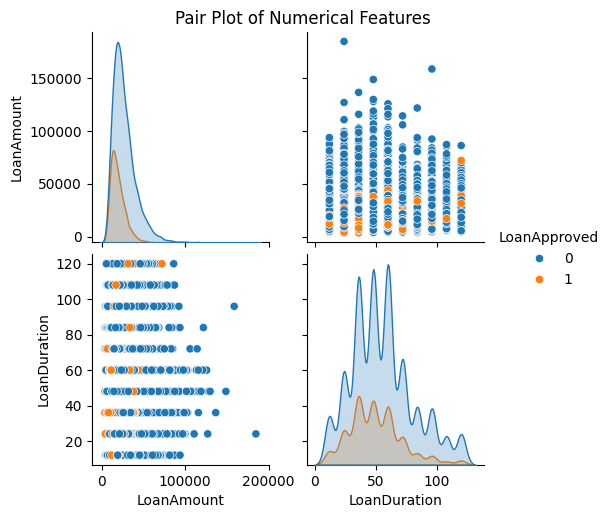

In [77]:
sns.pairplot(df[['LoanAmount','LoanDuration','LoanApproved']],hue='LoanApproved')
plt.suptitle('Pair Plot of Numerical Features',y=1.02)
plt.show()

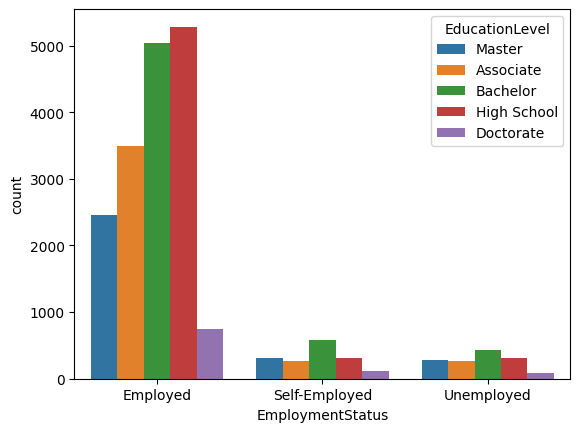

In [78]:
sns.countplot(x='EmploymentStatus',hue='EducationLevel',data=df)
plt.show()

## Target Variable-y


* Risk Score: To predict a continous risk score associated with each infividual's iikehood of loan default or financial instability

* Loan Approval: To determine the binary outcome of loan approval,indicating whether an applicant is likely to be approved or denied for a laon.

<ipython-input-79-e7b28c15aa10>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=df,palette='cool')


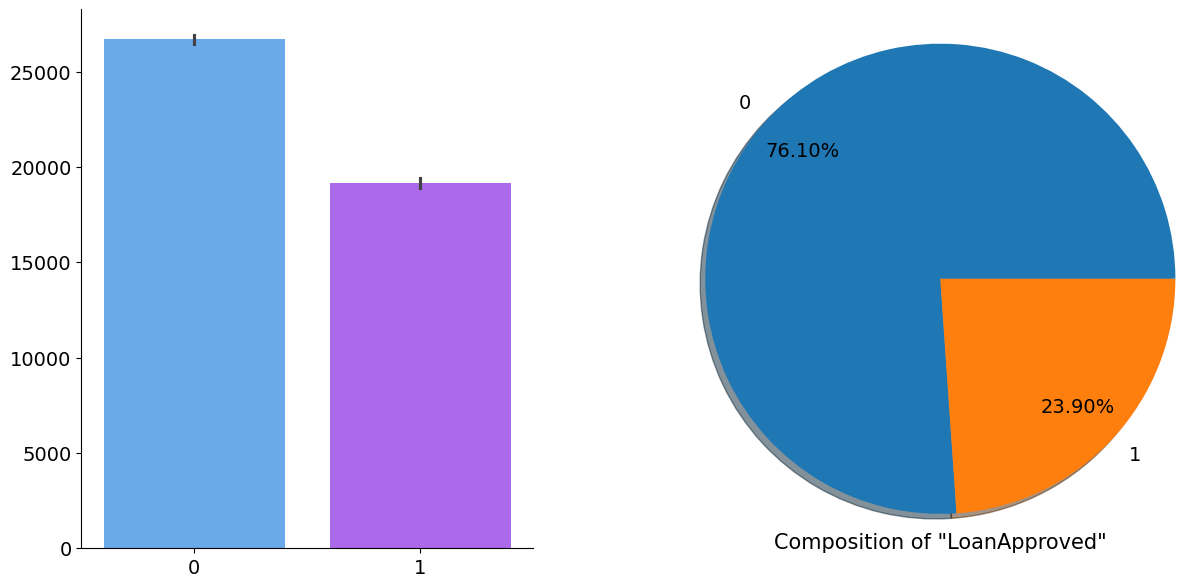

In [79]:
plt.figure(figsize=(14,7))
#barplot
ax1=plt.subplot(1,2,1)
cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=df,palette='cool')
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

#pieplot
ax2=plt.subplot(1,2,2)
plt.pie (x=df['LoanApproved'].value_counts(),
         labels=list(df['LoanApproved'].unique()),
         autopct='%2.2f%%',
         pctdistance=0.8,
         shadow=True,
         radius=1.3,
         textprops={'fontsize':14})
ax2.set_xlabel('')
plt.xlabel('Composition of "LoanApproved"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

no need of sampling since there are not only two categories in the target column and not that much diffrence in the values.

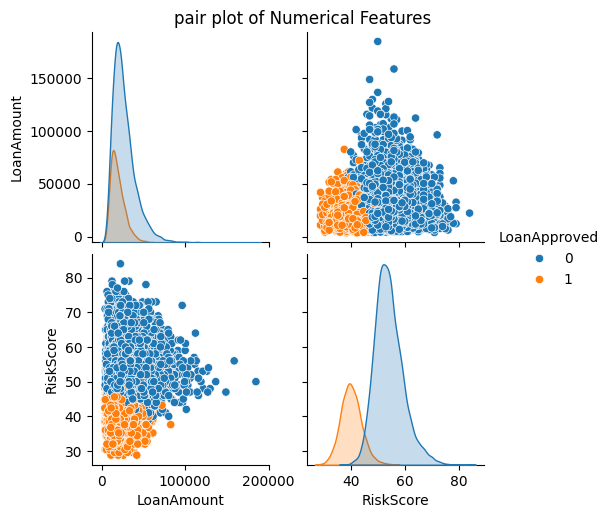

In [80]:
sns.pairplot(df[['LoanAmount','RiskScore','LoanApproved']],hue='LoanApproved')
plt.suptitle('pair plot of Numerical Features', y=1.02)
plt.show()

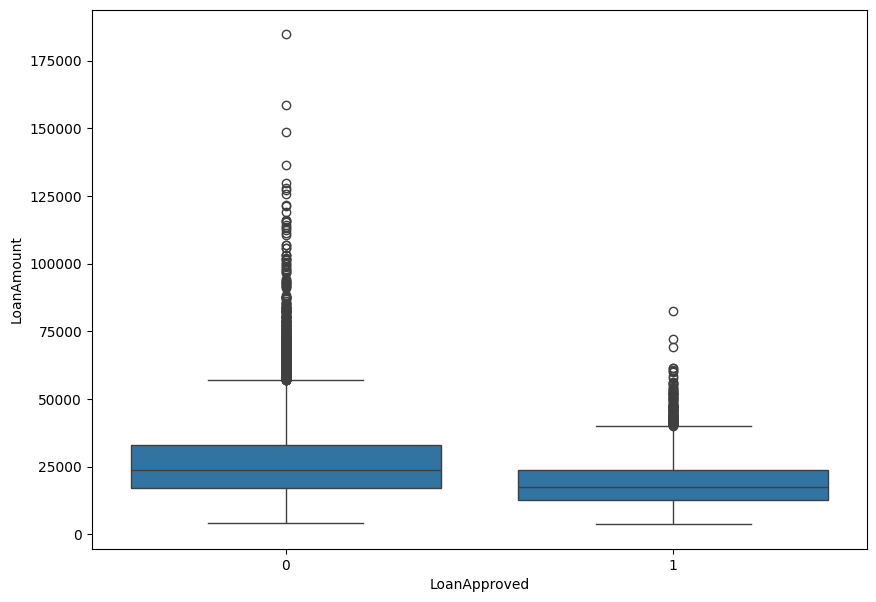

In [81]:
plt.figure(figsize=(10,7))
sns.boxplot(df,x='LoanApproved',y='LoanAmount')
plt.show()

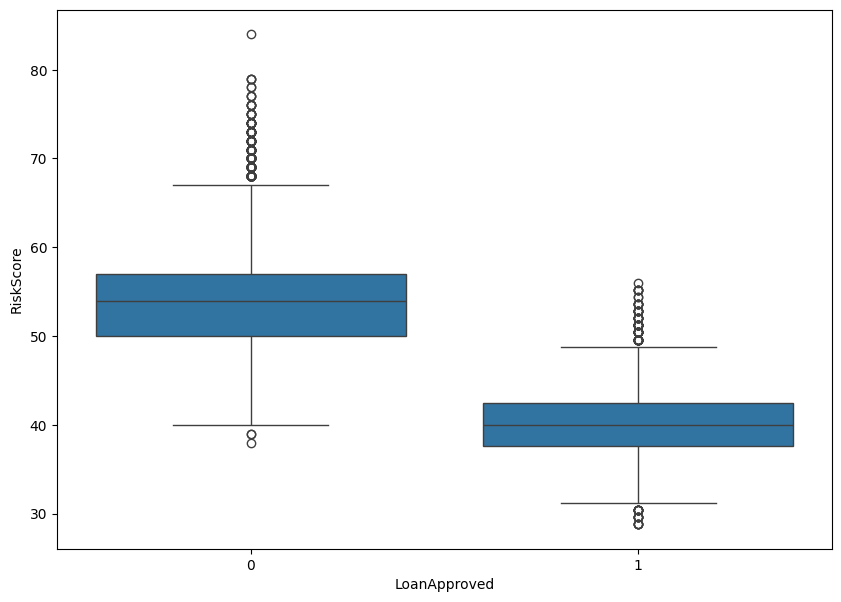

In [82]:
plt.figure(figsize=(10,7))
sns.boxplot(df,x='LoanApproved',y='RiskScore')
plt.show()

#  Data Cleaning

In [83]:
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


## Feature Engineering


In [84]:
df['BankBalance']=df['SavingsAccountBalance']+df['CheckingAccountBalance']
df.drop('SavingsAccountBalance',axis=1,inplace=True)
df.drop('CheckingAccountBalance',axis=1,inplace=True)

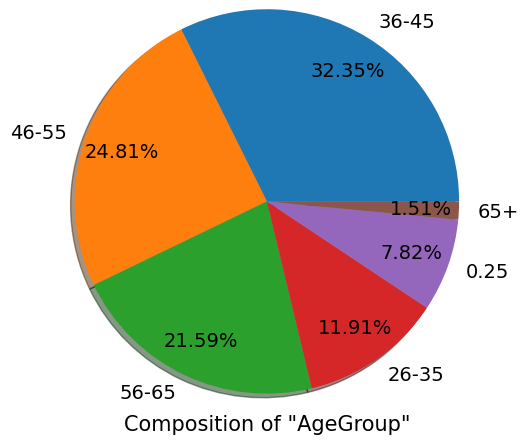

In [85]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,25,35,45,55,65,100],labels=['0.25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=df['AgeGroup'].value_counts(),
labels=list(df['AgeGroup'].unique()),
autopct='%2.2f%%',
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={'fontsize':14})
plt.xlabel('Composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()

In [86]:
df.drop('AgeGroup',axis=1,inplace=True)

In [87]:
df[['year','month','day']]=df['ApplicationDate'].str.split('-',expand=True)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

df[['ApplicationDate','year','month','day']]


,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [88]:
df['year'].max()

2072

so this columns contains wrong information

In [89]:
df.drop(['ApplicationDate','year','month','day'],axis=1,inplace=True)

## Encoding

In [90]:
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()
print('Categorical columns:',categorical_columns)

Categorical columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


## Ordinal data

Many machine learning models, like decision trees and regression models, rely on the relative order of numeric values. By manually assigning meaningful numbers, the model can better capture the relationship between the ordinal categories.

In [91]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [92]:
df['EmploymentStatus']=df['EmploymentStatus'].replace({'Unemployed':0,'Self-Employed':1,'Employed':2})

<ipython-input-92-7ed9cbb8c377>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EmploymentStatus']=df['EmploymentStatus'].replace({'Unemployed':0,'Self-Employed':1,'Employed':2})


In [93]:
df['EmploymentStatus'].unique()

array([2, 1, 0])

In [94]:
df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [95]:
df['EducationLevel']=df['EducationLevel'].map({'High School':0,
                                               'Associate':1,
                                               'Bachelor':2,
                                               'Master':3,
                                               'Doctorate':4})

In [96]:
df['EducationLevel'].unique()

array([3, 1, 2, 0, 4])

## Nominal data

In [97]:
le=LabelEncoder()
#exclude the 'ApplcationDate' column
for cols in df.select_dtypes('object').columns:
  if cols !='ApplicationDate':
    df[cols]=le.fit_transform(df[cols])


# Data Transformation

## Skewed Data

## Histogram

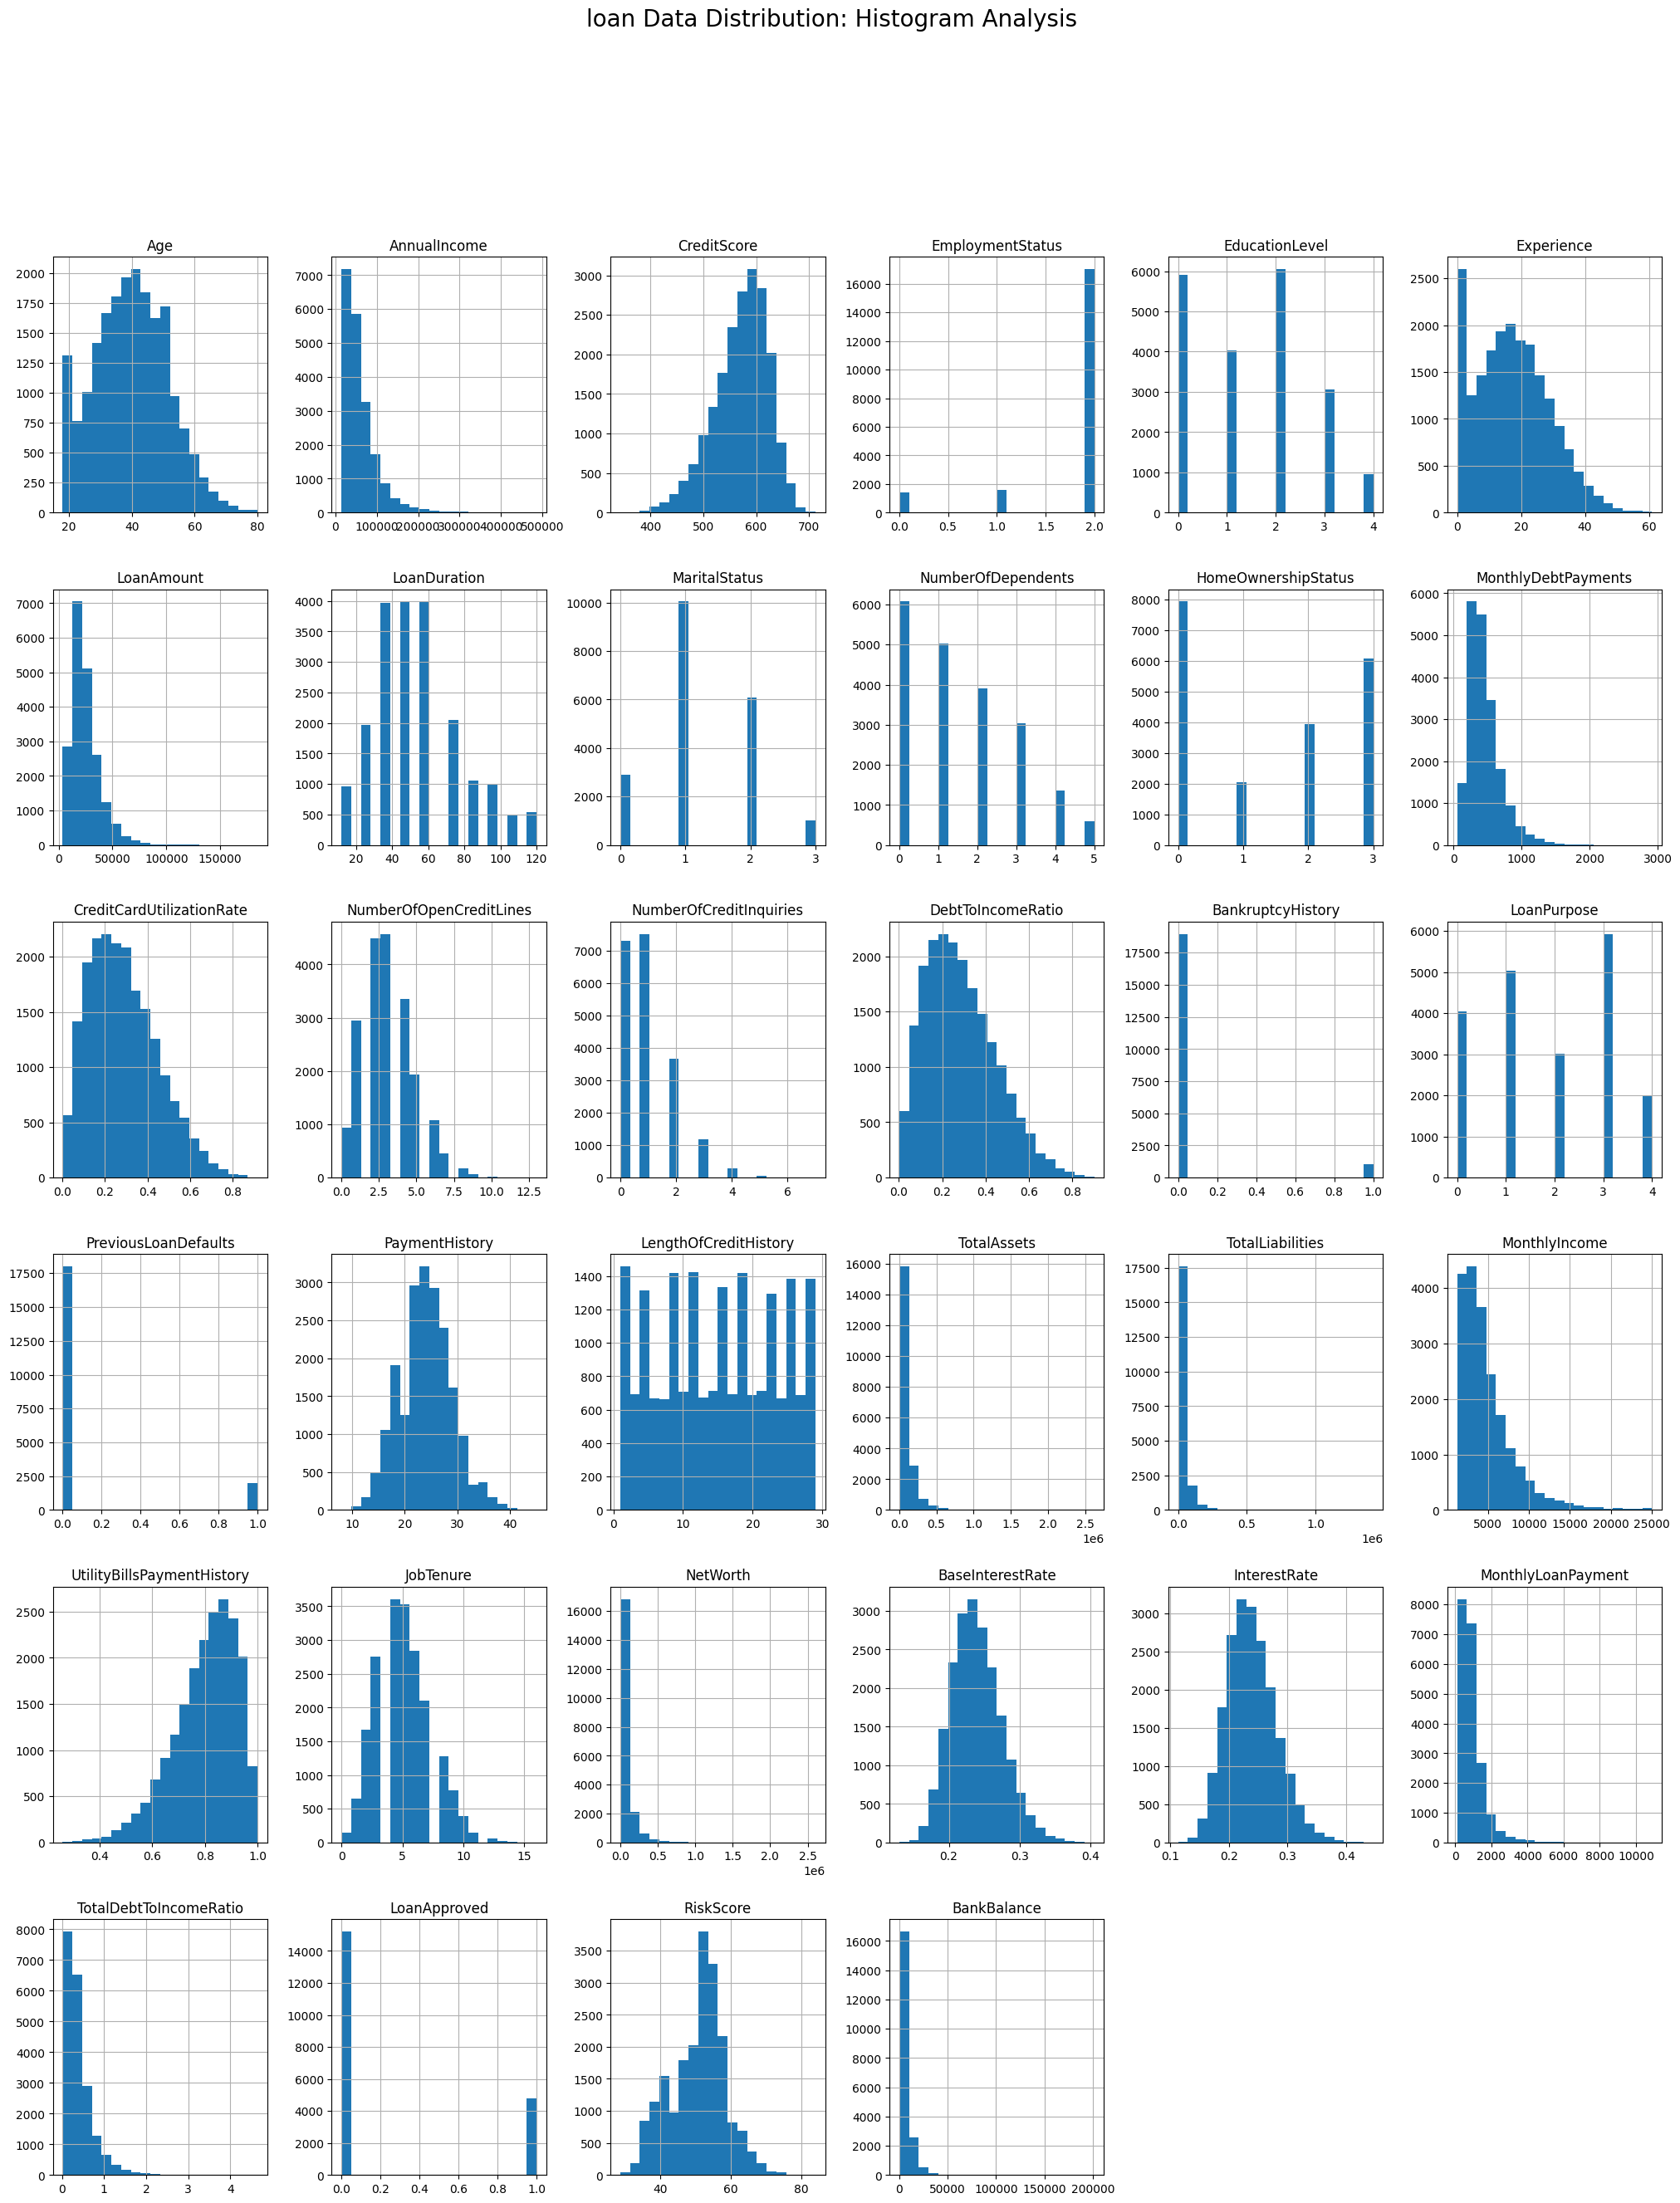

In [98]:
df.hist(bins=20, figsize=(25,30))
plt.suptitle('loan Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int64  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [100]:
# calculate skewness for each colum
skewness=df.skew()
#sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
#Display the sorted skewness values
print(sorted_skewness)

EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [101]:
# create a copy of the orginal data for comparison
df_copy= df.copy()

# Log Transformation of skewed columns (e.g.,AnnualIncome,LoanAmount)
df['AnnualIncome']-np.log1p(df['AnnualIncome'])
df['AnnualIncome']=np.log1p(df['LoanAmount'])

The log1p function in numpy stands for log(1+x),where "1p" refers to adding 1 to the input value before taking the logarithm

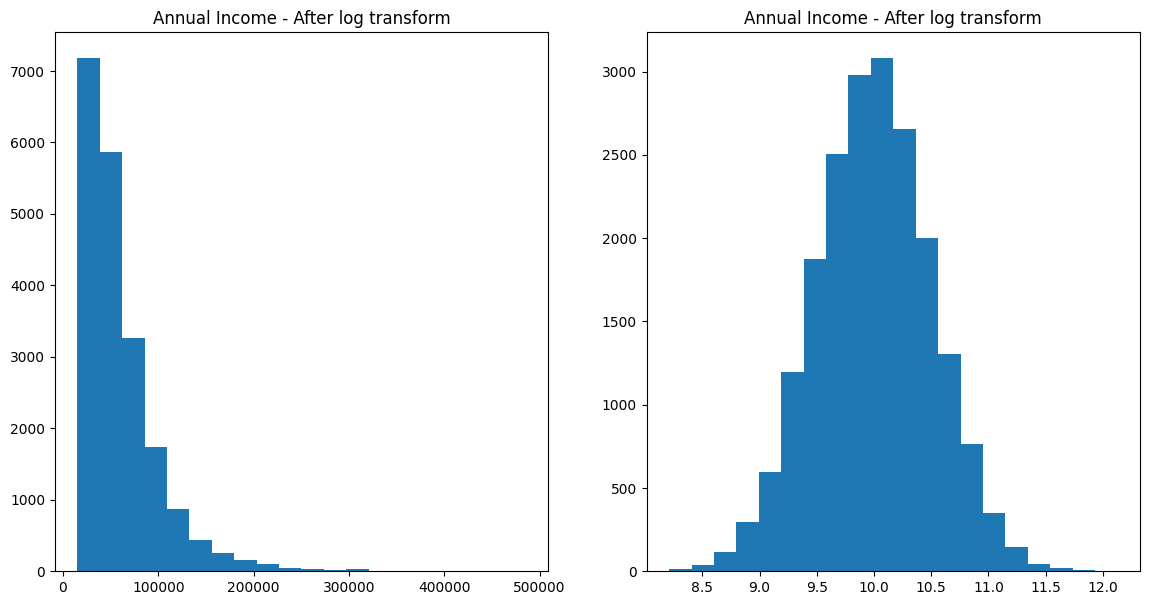

In [102]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(df_copy['AnnualIncome'],bins=20)
plt.title('Annual Income - After log transform')
#
ax2=plt.subplot(1,2,2)
plt.hist(df['AnnualIncome'],bins=20)
plt.title('Annual Income - After log transform')
plt.show()

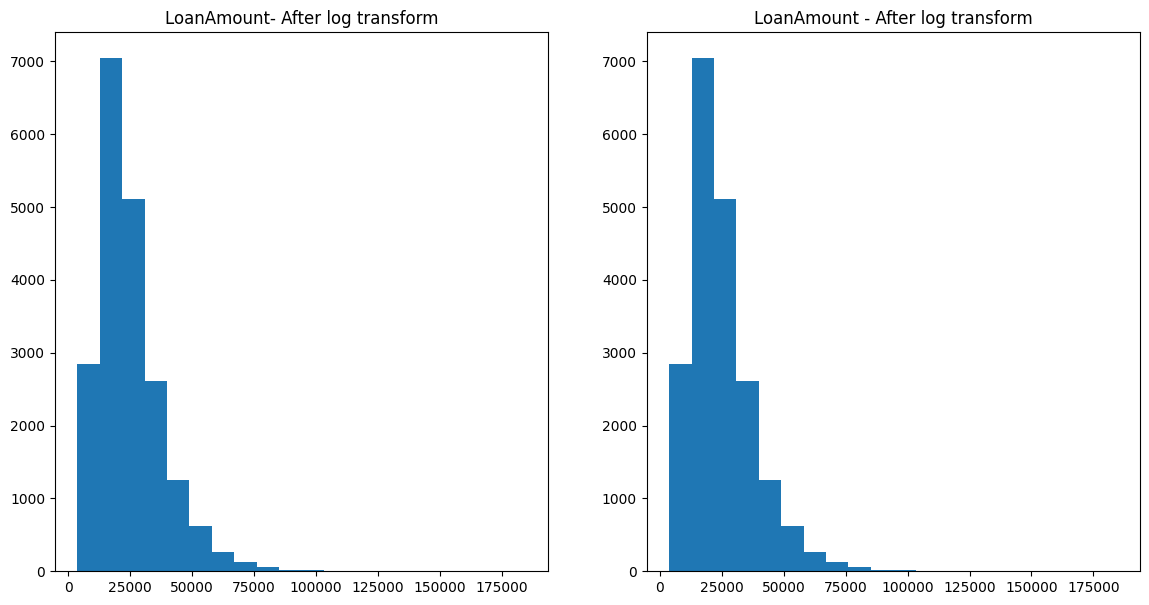

In [103]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(df_copy['LoanAmount'],bins=20)
plt.title('LoanAmount- After log transform')
#
ax2=plt.subplot(1,2,2)
plt.hist(df['LoanAmount'],bins=20)
plt.title('LoanAmount - After log transform')
plt.show()

In [104]:
# step 1:Select numeric columns, excluding 'LoanApproved'
numeric_columns=df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

skewness = numeric_columns.skew()

highly_skewed_columns=skewness[abs(skewness)>1].index

for col in highly_skewed_columns:
  df[col] = np.log1p(df[col])
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,9.484405,617,1.098612,3,22,9.484405,48,1,2,...,0.724972,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476
1,38,10.167619,628,1.098612,1,15,10.167619,48,2,1,...,0.935132,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137
2,47,9.777244,570,1.098612,2,26,9.777244,36,1,2,...,0.872241,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492
3,58,10.542680,545,1.098612,0,34,10.542680,96,2,1,...,0.896155,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049
4,37,9.125327,594,1.098612,1,17,9.125327,36,1,1,...,0.941369,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234


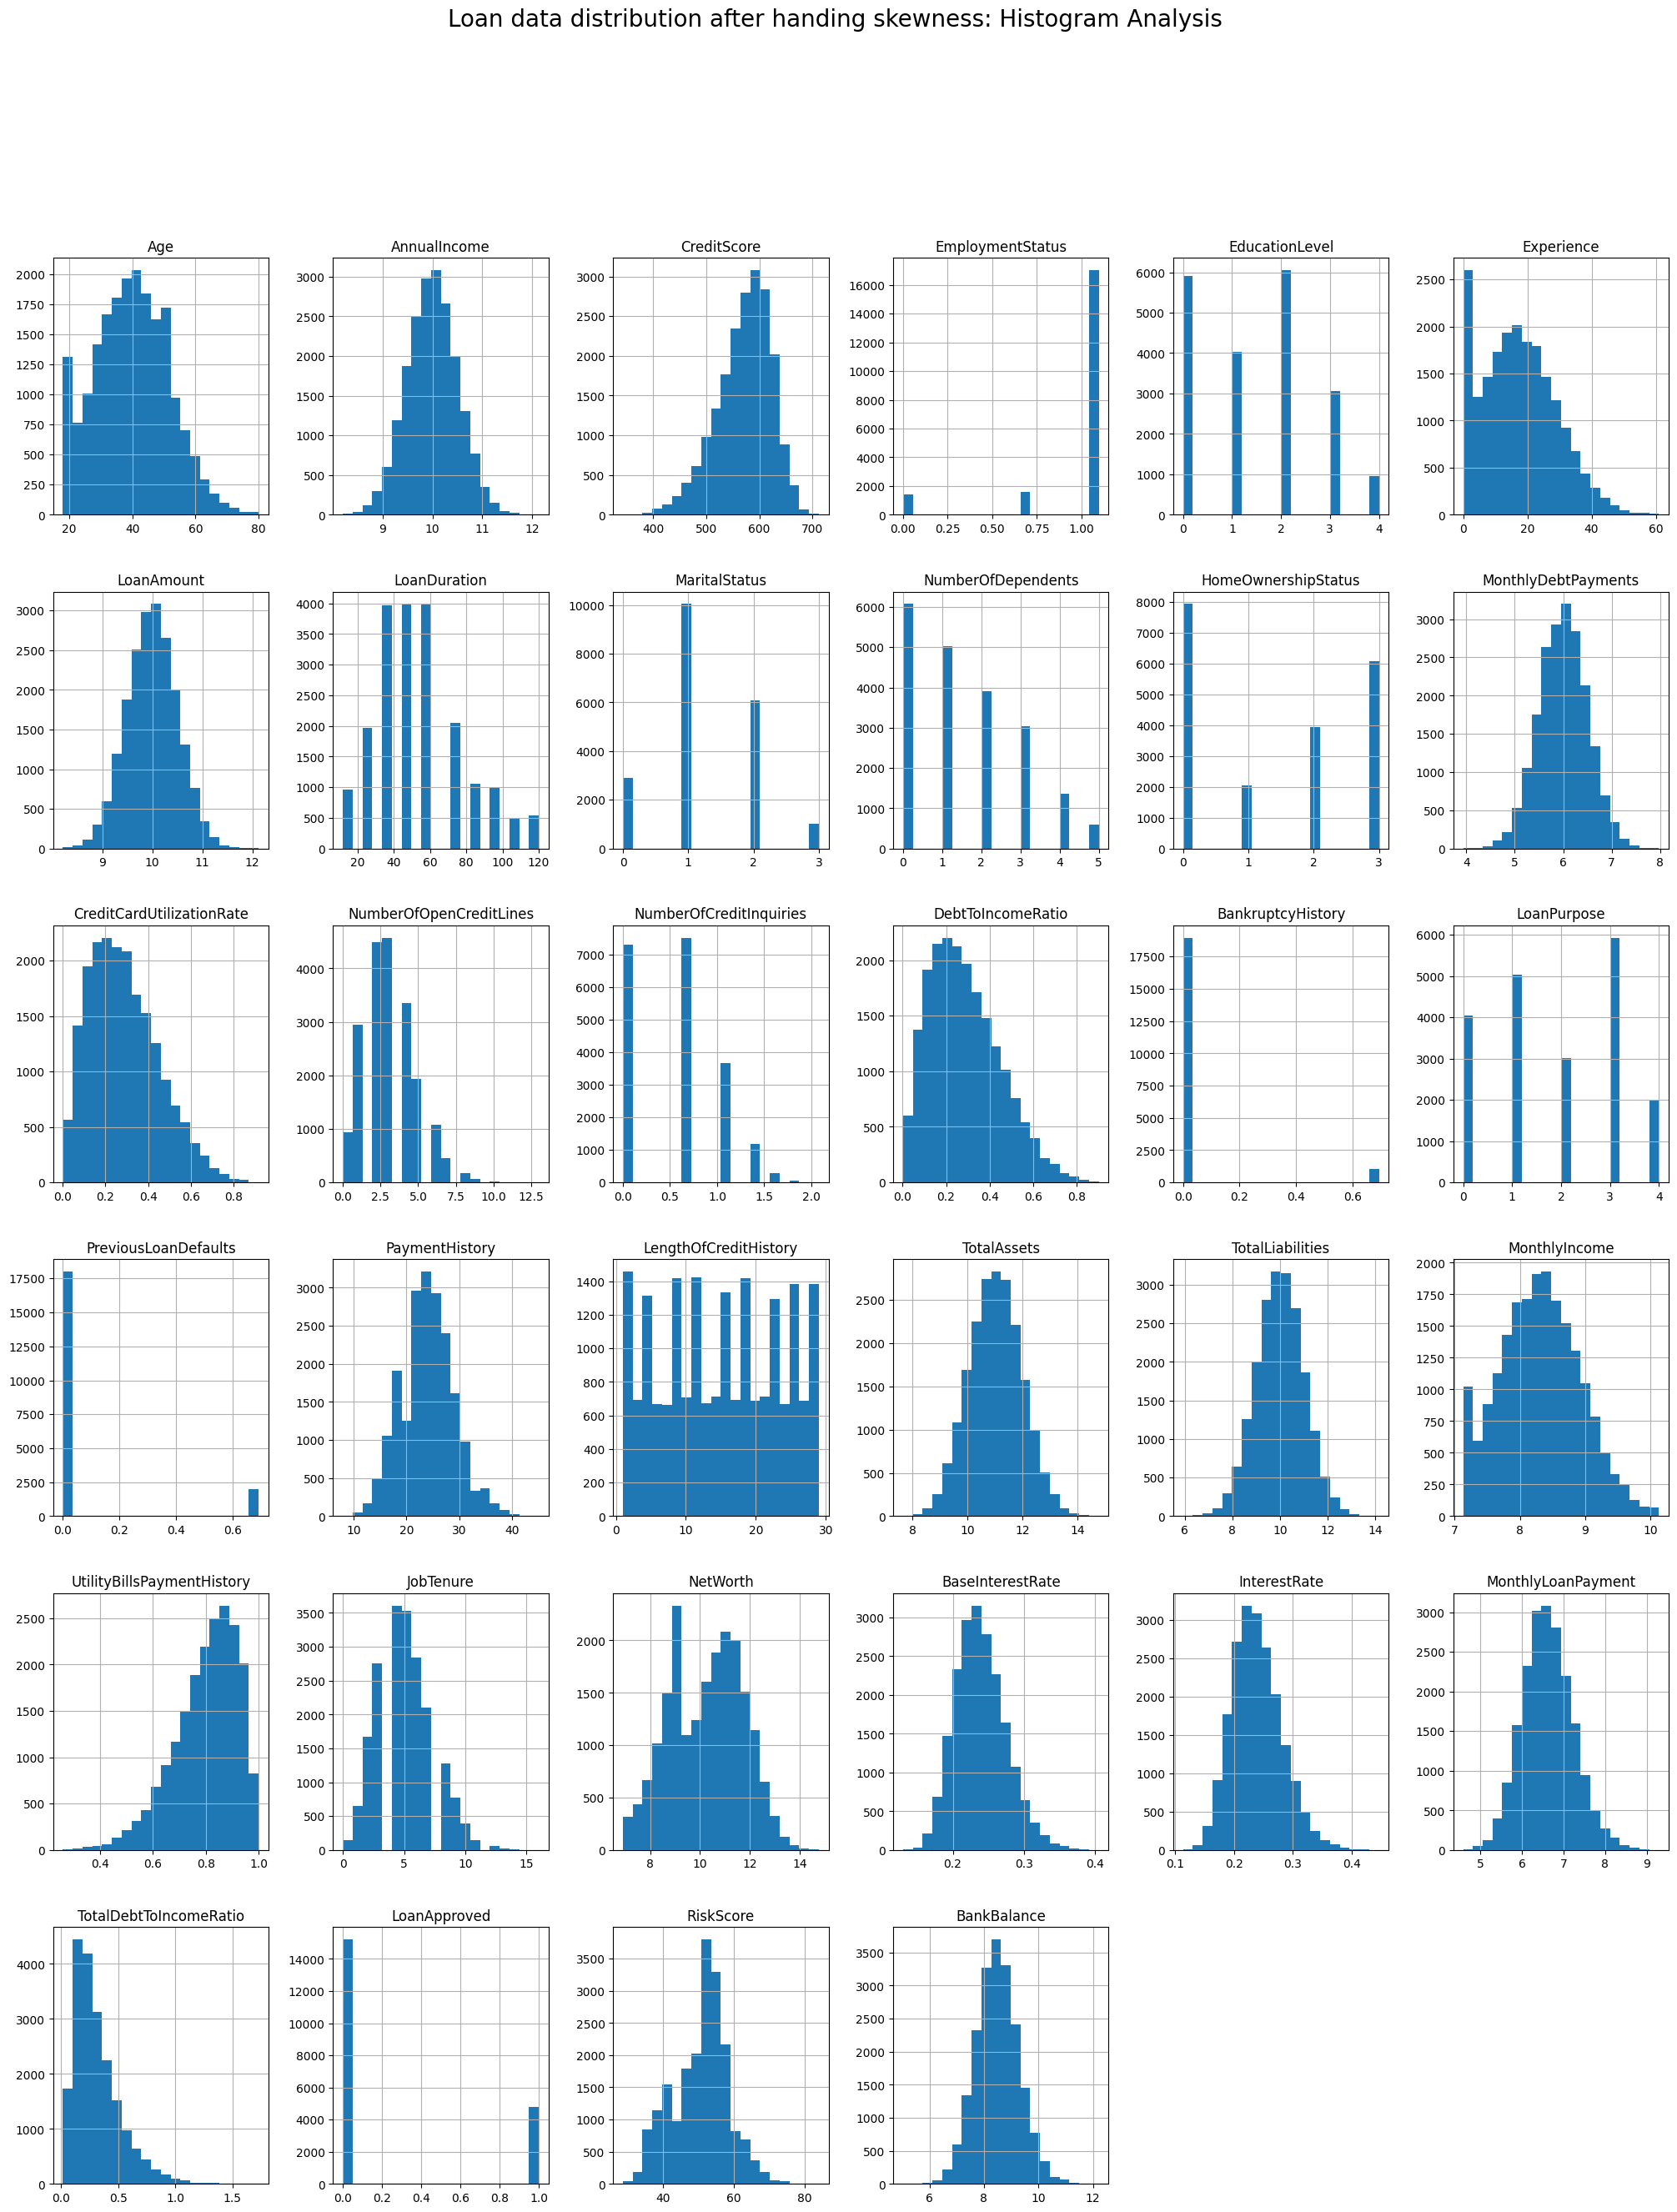

In [105]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan data distribution after handing skewness: Histogram Analysis',fontsize=20)
plt.show()

# Removing Unwanted features


## Based on correlation

After analyzing the correlation
* one among two Highly correlated features(between feature themselves).
* Features with low correlation with the target variable.

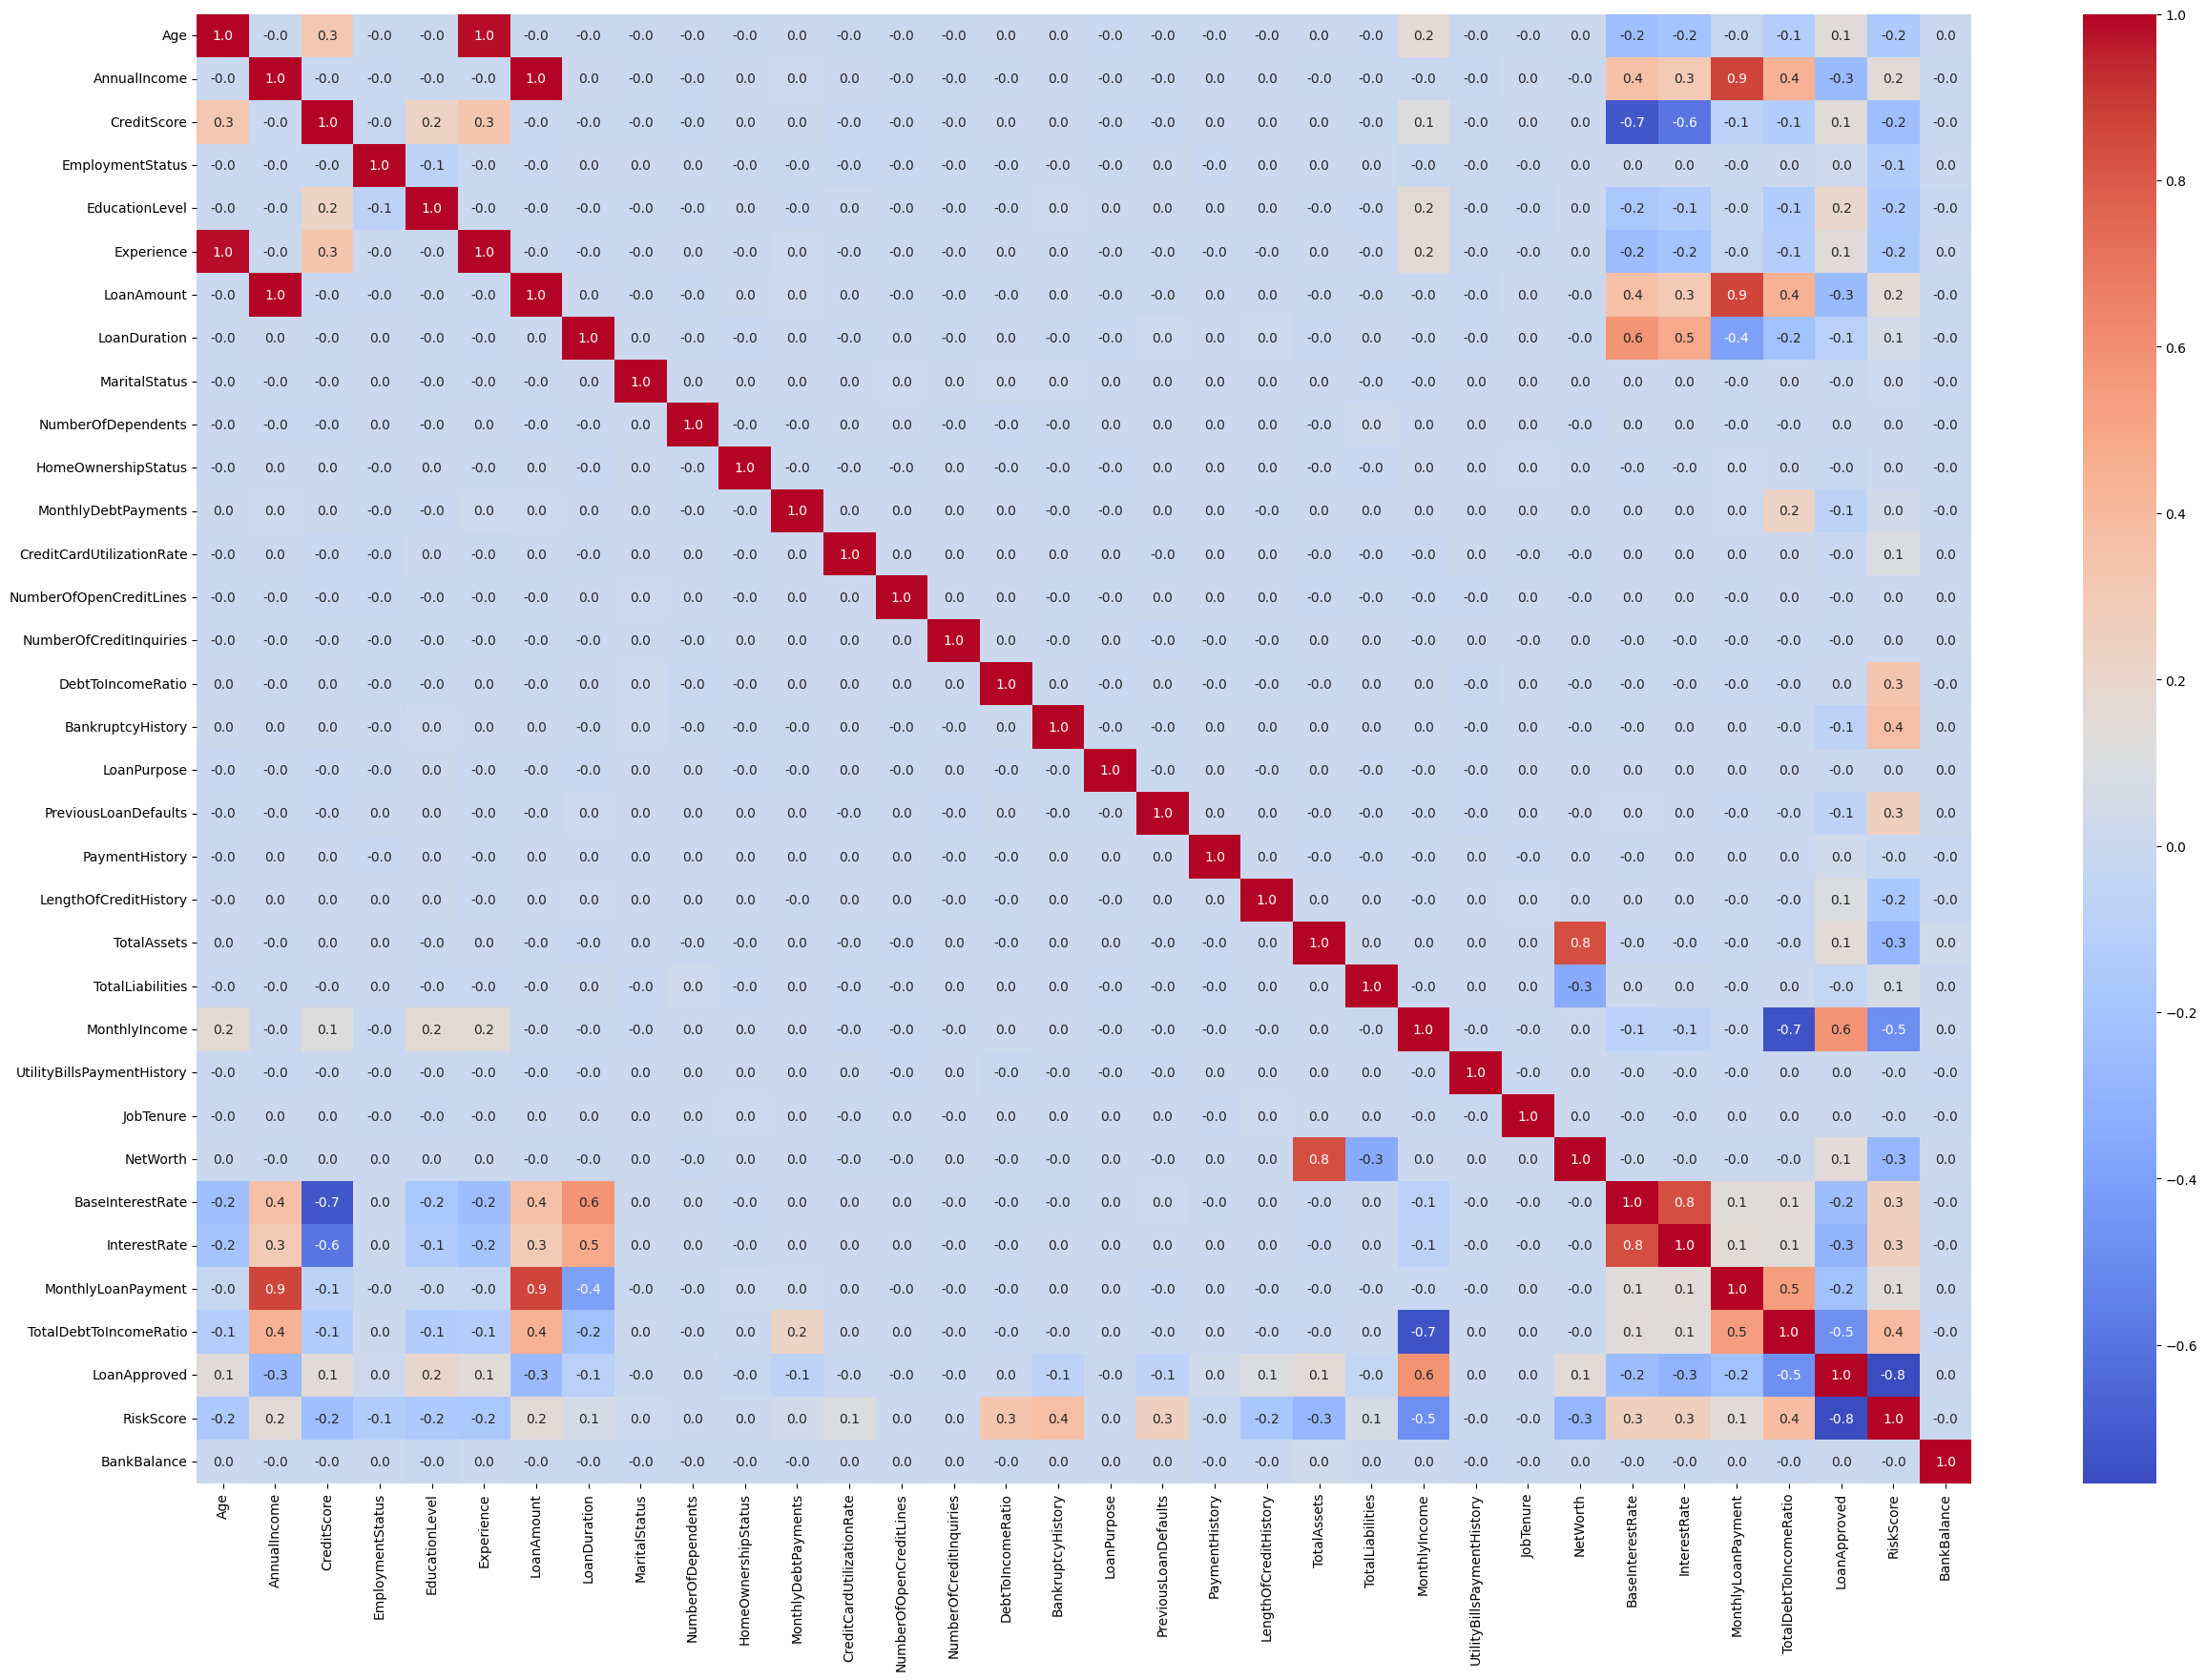

In [106]:
plt.figure(figsize=((30,20)))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)
plt.show()

In [107]:
correlation_matrix = df.corr()
#set the correlation threshold
threshold=0.5
#Find pairs of Feature with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # check if the absoulte correlation exceeds the threshold
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
      #print all the pairs of highly correlated feature
  print(highly_correlated_pairs)


[]
[]
[]
[]
[]
[('Experience', 'Age')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experience', 'Age'), ('LoanAmount', 'AnnualIncome')]
[('Experi

In [108]:
df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

In [109]:
df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()
#highly correlated

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [110]:
df.drop(('TotalDebtToIncomeRatio'),axis=1,inplace=True)

In [111]:
#step: calculate the correlation of the feature with the target
corr_with_target=df.corr()['LoanApproved'].sort_values(ascending=False)

low_corr_features=corr_with_target[(corr_with_target>-0.05)&(corr_with_target<0.05)]
print('Features with correlation between -0.1 and 0.1:')
print(low_corr_features)

Features with correlation between -0.1 and 0.1:
PaymentHistory                0.030804
EmploymentStatus              0.024961
JobTenure                     0.004997
BankBalance                   0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [112]:
df.drop(['MonthlyDebtPayments','HomeOwnershipStatus','PaymentHistory','BankBalance'],axis=1,inplace=True)

In [113]:
df.columns

Index(['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'InterestRate', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [114]:
df.drop(['LoanDuration'],axis=1,inplace=True)

In [115]:
df.drop('EducationLevel',axis=1,inplace=True)

In [116]:
df.drop(['Age'],axis=1,inplace=True)

In [117]:
df.columns

Index(['CreditScore', 'EmploymentStatus', 'LoanAmount', 'MaritalStatus',
       'NumberOfDependents', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'InterestRate', 'LoanApproved', 'RiskScore'],
      dtype='object')

## PCA

PCA reduces the number of features(dimensions) in a dataset.

* principal components: these RE THE NEW FEATURE created bt PCA. each principal component is a linear combination of the orginal features, and they are ranked based on the amount of varience they explaain in the data.

In [118]:
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA

#apply PCA
pca=PCA(n_components=5)
loan_pca = pca.fit_transform(df)
# create a data frame with the pca result
loan_pca_final_df=pd.DataFrame(loan_pca,columns=[f'PC{i+1}'for i in range (loan_pca.shape[1])])
loan_pca_final_df=pd.concat([df.reset_index(drop=True),loan_pca_final_df],axis=1)
loan_pca_final_df.head()

,CreditScore,EmploymentStatus,LoanAmount,MaritalStatus,NumberOfDependents,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,...,JobTenure,NetWorth,InterestRate,LoanApproved,RiskScore,PC1,PC2,PC3,PC4,PC5
0,617,1.098612,9.484405,1,2,0.354418,1,1.098612,0.358336,0.0,...,11,11.751383,0.227590,0,49.0,45.417305,-5.096861,-3.159755,5.991642,-2.090876
1,628,1.098612,10.167619,2,1,0.087827,5,1.386294,0.330274,0.0,...,3,10.683042,0.201077,0,52.0,56.294234,-6.883653,-0.185717,-1.970303,2.024434
2,570,1.098612,9.777244,1,2,0.137414,2,0.000000,0.244729,0.0,...,6,8.557567,0.212548,0,52.0,-1.650508,5.436422,4.699053,0.950788,-1.041885
3,545,1.098612,10.542680,2,1,0.267587,2,0.693147,0.436244,0.0,...,5,11.507440,0.300911,0,54.0,-26.719402,-5.350125,-0.664396,0.014664,-1.037992
4,594,1.098612,9.125327,1,1,0.320535,0,0.000000,0.078884,0.0,...,5,12.332793,0.175990,1,36.0,22.941009,17.473582,-6.051871,-0.103620,-3.014837


## Scaling


stanardization and nominalization are two common techniques used in data preprocissing to scale feature

### Standardization:

standardization transforms data to have a mean of  0 and a standard deviation of 1. this is done by subtracting the mean og the data and dividing by the stantard deviation.

standardization is usefull when  you are data folllows a normal distribution or it using machine learning algorithms that normaly rely on the distance between data points(e.g.k-NN,PCA).

In [119]:
loan_scaled_df = df.copy()

numeric_columns = df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

scaler =StandardScaler()

loan_scaled_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
loan_scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,MaritalStatus,NumberOfDependents,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,...,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,-0.340898,0.348195,0.425792,-1.165445,1.085108,0.453170,-0.235154,...,-0.333426,-0.711630,-0.136881,-0.324366,-0.621121,2.681281,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,0.971763,-0.373154,-1.242602,1.138546,1.678040,0.278010,-0.235154,...,-0.333426,-0.711630,-0.828648,-0.334247,1.120606,-0.895340,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.340898,0.348195,-0.932273,-0.589447,-1.179206,-0.255954,-0.235154,...,-0.333426,0.841287,1.765237,-0.292687,0.599385,0.445893,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,0.971763,-0.373154,-0.117617,-0.589447,0.249417,0.939471,-0.235154,...,-0.333426,-0.592175,-1.408173,0.577602,0.797576,-0.001185,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,-0.340898,-0.373154,0.213746,-1.741443,-1.179206,-1.291147,-0.235154,...,-0.333426,1.438563,-0.240858,1.239575,1.172293,-0.001185,1.420252,-1.495584,1,-1.898515


### Normalization

normalization transforms data to a specific range,usally[0.1]or[-1,1].The idea is to rescale the data without distorting the differences in th ranges of values.

normalization is perferred when you know that the data does not follow a normal distribution and when you need to cionstrin the data within  a fixed range. it is commaly used in algorthms such as neural networks and k-means clustring, where the mangnitued of the data matters

### Handling Outliers

### Boxplot

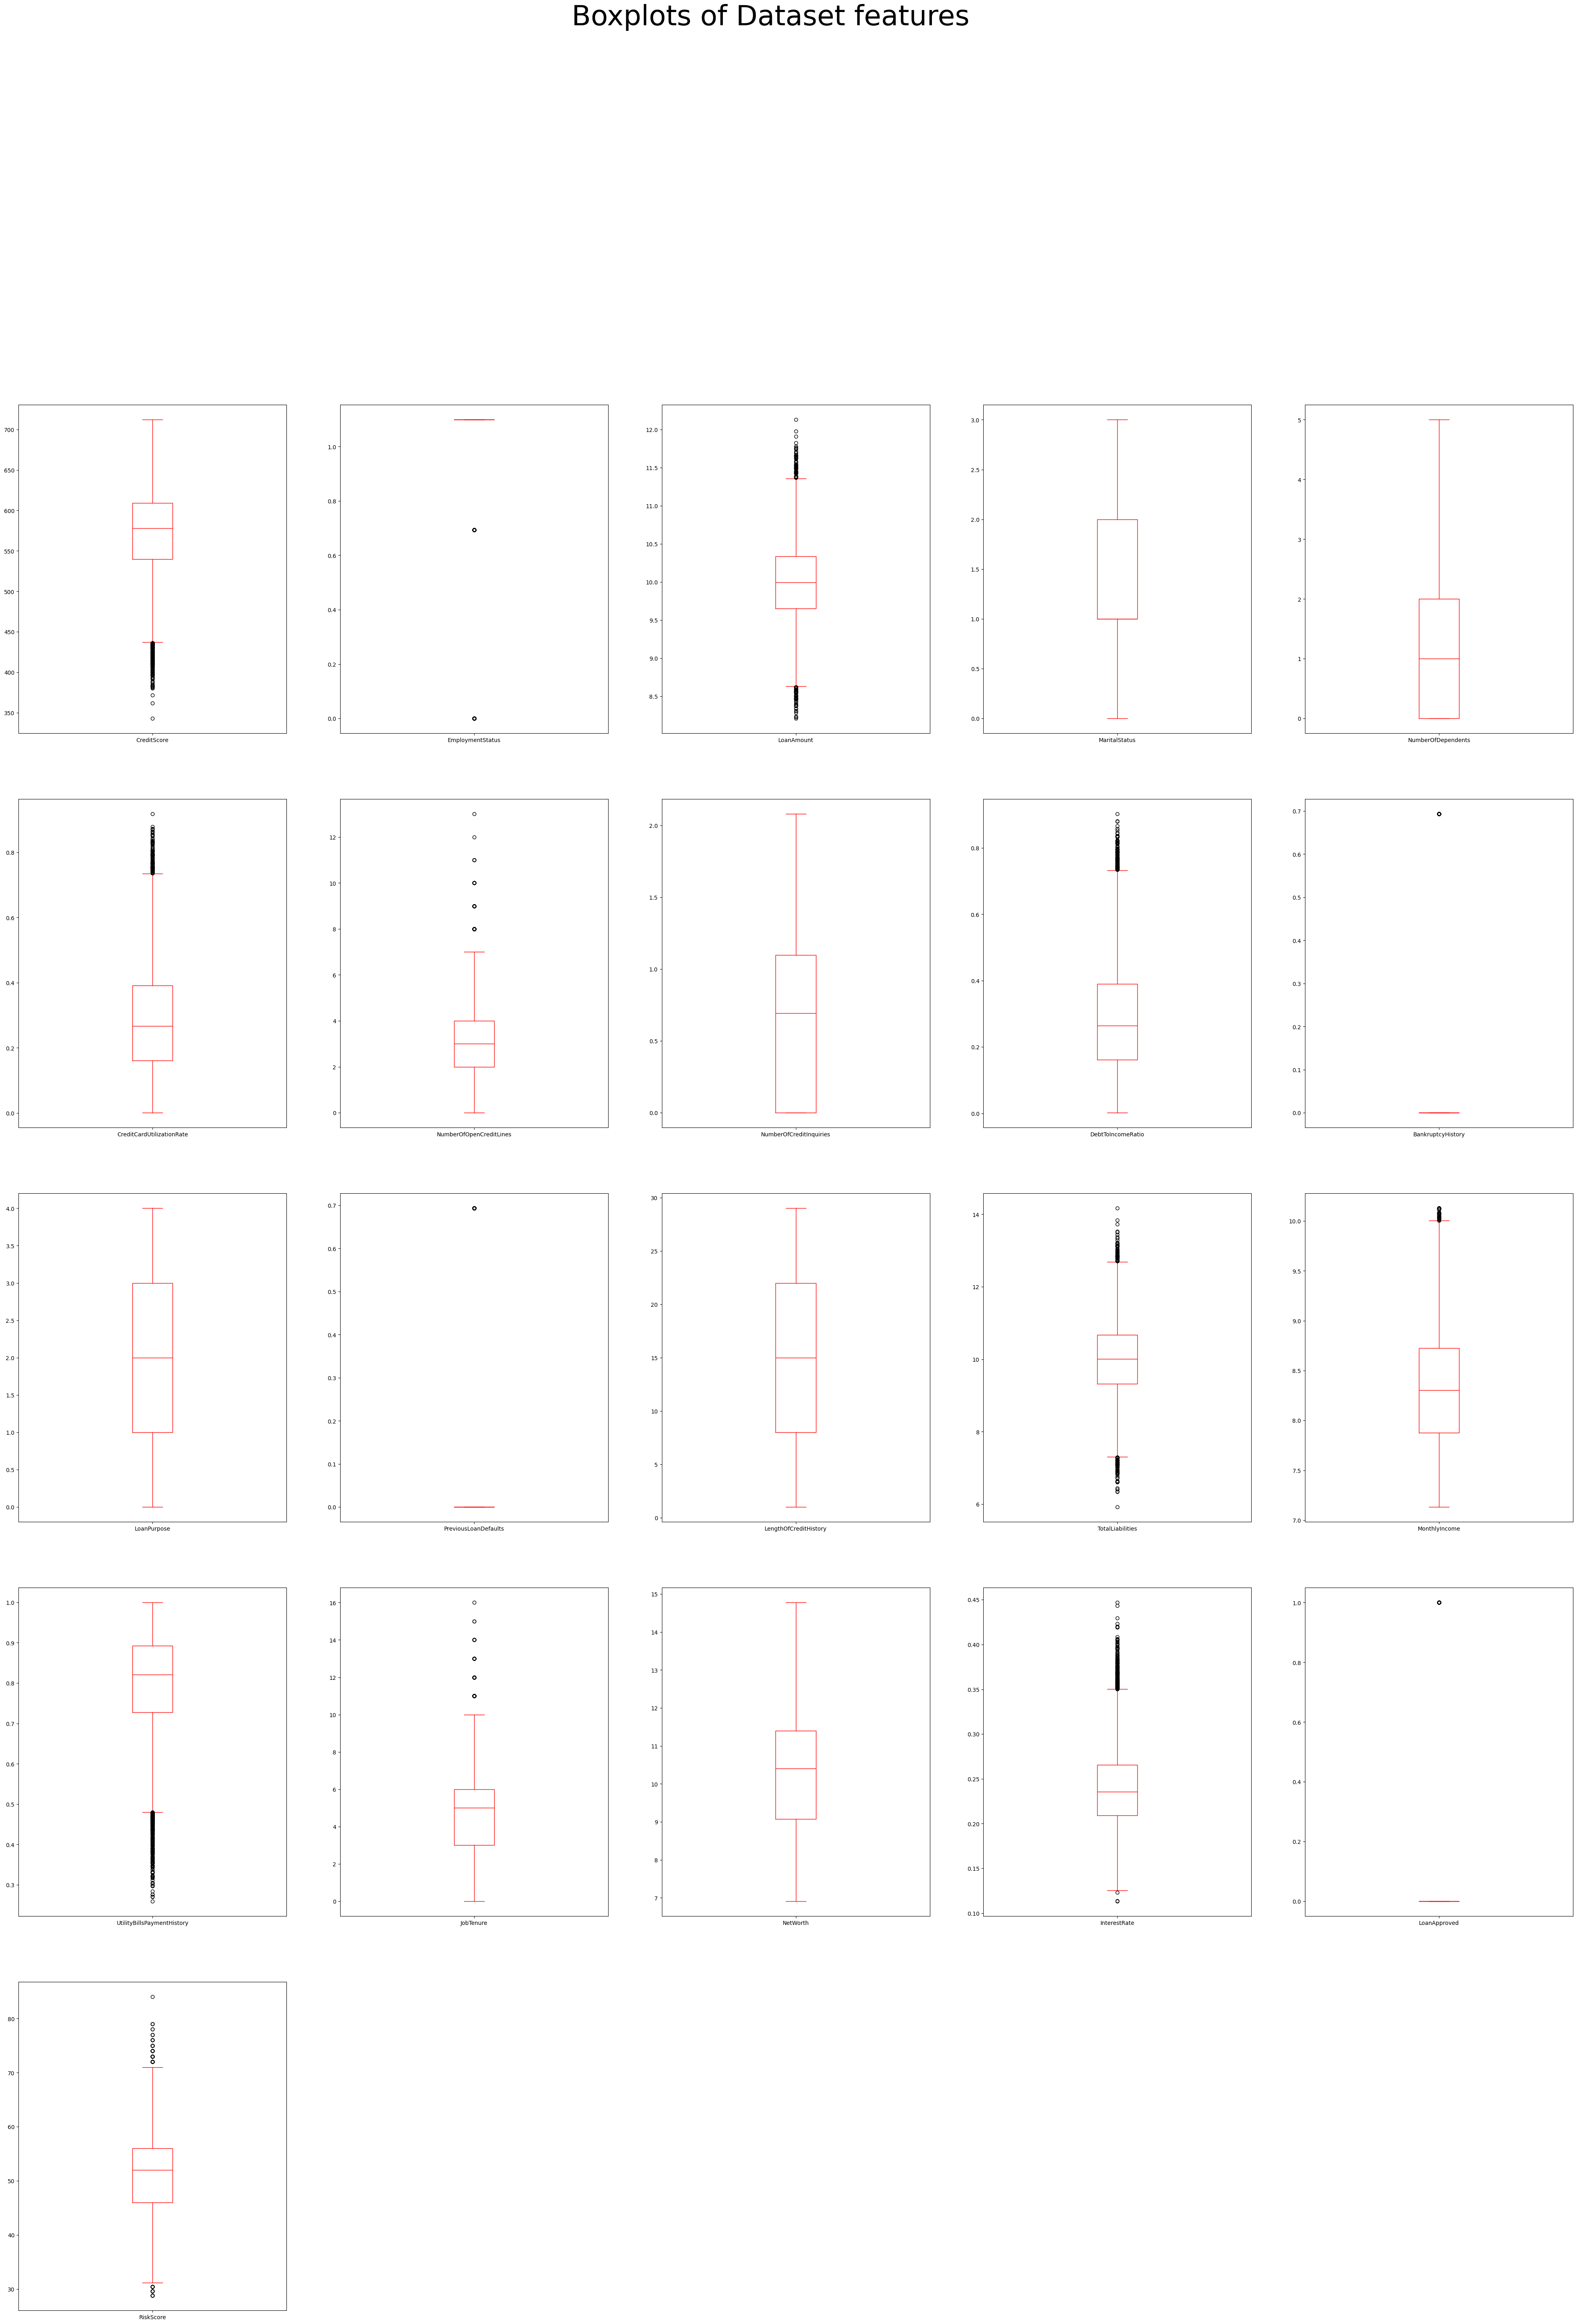

In [120]:
df.plot(kind='box',subplots=True, layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset features',fontsize=50)
plt.show()

In [121]:
df_copy = df.copy()
def remove_outliers_iqr(df, exclude_columns):
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR= Q3-Q1

    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5* IQR

    df = df[(df[column]>= lower_bound) & (df[column]<=upper_bound)]

  return df

exclude_columns = ['LoanApproved', 'RiskScore']


df= remove_outliers_iqr(df, exclude_columns)

print('shape of data before removing outliears:',df_copy.shape)
print('shape of data after removing outliers:',df.shape)
print('Number of outliers removing:',df_copy.shape[0]-df.shape[0])



shape of data before removing outliears: (20000, 21)
shape of data after removing outliers: (13217, 21)
Number of outliers removing: 6783


# Model building

##  Regression model

* riskscore regression: to predict a continuous risk score associated with each individual's likelihood of loan default instability

In [122]:
x1=df.drop('RiskScore',axis=1)
y1=df[['RiskScore']]

In [123]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)
print("shape of Training Features:",x1_train.shape)
print("shape of Testing Features:",x1_test.shape)
print("shape of Training Target :",y1_train.shape)
print("shape of Testing Target :",y1_test.shape)

shape of Training Features: (10573, 20)
shape of Testing Features: (2644, 20)
shape of Training Target : (10573, 1)
shape of Testing Target : (2644, 1)


In [124]:
models={
    "Linear_Regression":LinearRegression(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "GradientBoosting_Regressor":GradientBoostingRegressor(),
    "DecisionTree_Regressor":DecisionTreeRegressor(),
    "SVM":SVR(),
    #"MLP_regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    # 'catBoostRegressor':catBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [125]:
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1_train,y1_train)
  # make prediction
  y1_pred=model.predict(x1_test)

  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)

  #  converts results to a DataFrame
results_df=pd.DataFrame(results)
  # Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 10573, number of used features: 17
[LightGBM] [Info] Start training from score 48.889227


,model,MSE,MAE,R2
0,Linear_Regression,3.422054,1.477128,0.927370
1,RandomForest_Regressor,0.495138,0.438816,0.989491
2,GradientBoosting_Regressor,0.104052,0.220632,0.997792
3,DecisionTree_Regressor,1.064312,0.556354,0.977411
4,SVM,43.377462,5.127782,0.079349
5,AdaBoostRegressor,2.578581,1.259986,0.945272
6,BaggingRegressor,0.579057,0.477383,0.987710
7,LGBMRegressor,0.118682,0.205924,0.997481
8,XGBRegressor,0.150472,0.249410,0.996806


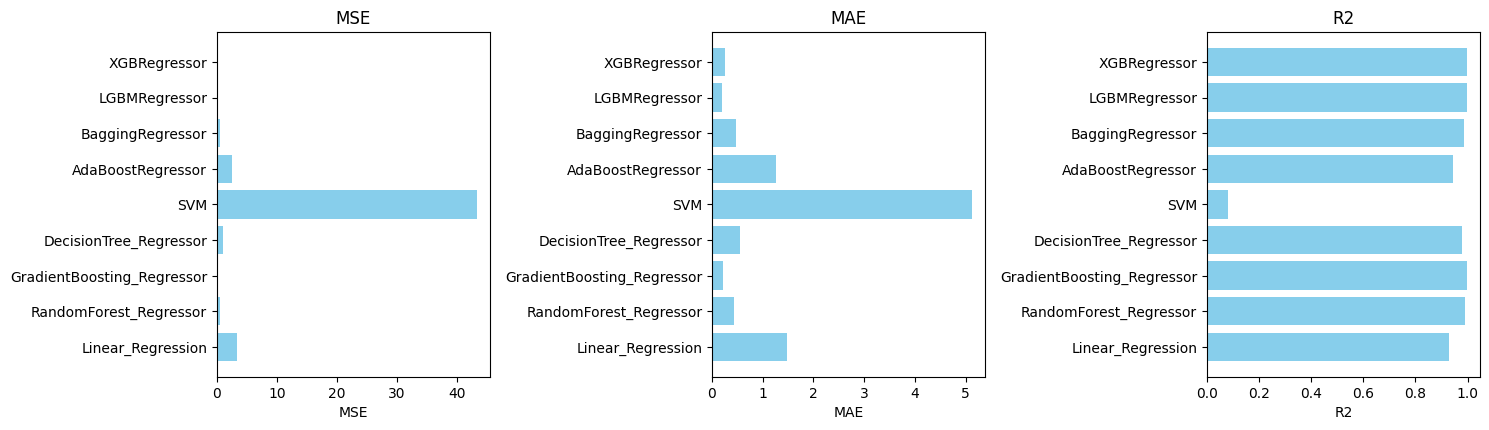

In [126]:
# ploting each metric
metrics=['MSE','MAE','R2']

plt.figure(figsize=(15,8))

for i, metric in enumerate(metrics):
  plt.subplot(2,3,i+1)
  plt.barh(results_df['model'],results_df[metric],color="skyblue")
  plt.title(metric)
  #plt.xlim(0,1)
  plt.xlabel(metric)
plt.tight_layout()
plt.show()

#### Regression On scaled Data

In [127]:
x1s=loan_scaled_df.drop('RiskScore',axis=1)
y1s=loan_scaled_df[['RiskScore']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1s_train,y1s_train)
  # make prediction
  y1s_pred=model.predict(x1s_test)

  mse1=mean_squared_error(y1s_test,y1s_pred)
  mae1=mean_absolute_error(y1s_test,y1s_pred)
  r21=r2_score(y1_test,y1_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)

  #  converts results to a DataFrame
  results_df1=pd.DataFrame(results)
  # Display the results
  # results_df1
# sort by Accuracy
results_df1=results_df1.sort_values(by="MSE",ascending=True)
# display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2364
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 20
[LightGBM] [Info] Start training from score 0.009876


,model,MSE,MAE,R2
7,LGBMRegressor,0.002336,0.030766,0.996806
8,XGBRegressor,0.003605,0.036544,0.996806
2,GradientBoosting_Regressor,0.005639,0.054660,0.996806
1,RandomForest_Regressor,0.013254,0.071847,0.996806
6,BaggingRegressor,0.016290,0.080285,0.996806
3,DecisionTree_Regressor,0.028659,0.093815,0.996806
4,SVM,0.030961,0.136435,0.996806
0,Linear_Regression,0.062954,0.200803,0.996806
5,AdaBoostRegressor,0.086562,0.232130,0.996806


Based on the analysis of the loan approvel dataset for predicting the rickscore , the GradientBoostingRegressor model demonstrated the best performance among the tested models

## classification modeling

* Binary loan approvel classification : to determine the binary outcome of loan approvel , indicating whether an applicant is likely to approved or denied for a loan

In [130]:
df['LoanApproved']=df['LoanApproved'].astype(int)
x=df.drop('LoanApproved',axis=1)
y=df[["LoanApproved"]]

In [131]:
df[['LoanApproved']].value_counts()

,count
LoanApproved,
0,9783
1,3434


In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print("shape of Training Features:",x_train.shape)
print("shape of Testing Features:",x_test.shape)
print("shape of Training Target :",y_train.shape)
print("shape of Testing Target :",y_test.shape)

shape of Training Features: (10573, 20)
shape of Testing Features: (2644, 20)
shape of Training Target : (10573, 1)
shape of Testing Target : (2644, 1)


In [133]:
class_models={'lr':LogisticRegression(max_iter=500),
    "rfc":RandomForestClassifier(),
    "gbc":GradientBoostingClassifier(random_state=0,learning_rate=0.45),
    "dtc":DecisionTreeClassifier(),
    "SVM":SVC(kernel='linear'),
    'knn':KNeighborsClassifier(n_neighbors=11),
    'etc':ExtraTreesClassifier(),
    'nb':GaussianNB()

}

In [134]:
# dictionary to store results
results={'model':[],'Accuracy':[],'precision':[],'recall':[],'f-1score':[]}

for model_name,model in class_models.items():
  # Train the model
  model.fit(x_train,y_train)
  model_pred=model.predict(x_test)

  # calculate metrics
  accuracy=accuracy_score(y_test,model_pred)
  precision=precision_score(y_test,model_pred)
  recall=recall_score(y_test,model_pred)
  f1=f1_score(y_test,model_pred)

   # stores result in the dictionary
  results['model'].append(model)
  results['Accuracy'].append(accuracy)
  results['precision'].append(precision)
  results['recall'].append(recall)
  results['f-1score'].append(f1)

#  converts results to a DataFrame
results_df1=pd.DataFrame(results)
# Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

,model,MSE,MAE,R2
0,Linear_Regression,3.422054,1.477128,0.927370
1,RandomForest_Regressor,0.495138,0.438816,0.989491
2,GradientBoosting_Regressor,0.104052,0.220632,0.997792
3,DecisionTree_Regressor,1.064312,0.556354,0.977411
4,SVM,43.377462,5.127782,0.079349
5,AdaBoostRegressor,2.578581,1.259986,0.945272
6,BaggingRegressor,0.579057,0.477383,0.987710
7,LGBMRegressor,0.118682,0.205924,0.997481
8,XGBRegressor,0.150472,0.249410,0.996806


In [135]:
x2s=loan_scaled_df.drop('LoanApproved',axis=1)
y2s=loan_scaled_df[['LoanApproved']]
x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)
# dictionary to store results
results={'model':[],'Accuracy':[],'precision':[],'recall':[],'f-1score':[]}
# loop through the models train them and calculate the metrics
for model_name,model in class_models.items():
  # Train the model
  model.fit(x2s_train,y2s_train)
  # make prediction
  model_pred2s=model.predict(x2s_test)

  # calculate metrics
  accuracy2=accuracy_score(y2s_test,model_pred2s)
  precision2=precision_score(y2s_test,model_pred2s)
  recall2=recall_score(y2s_test,model_pred2s)
  f12=f1_score(y2s_test,model_pred2s)
  # stores result in the dictionary
  results['model'].append(model)
  results['Accuracy'].append(accuracy2)
  results['precision'].append(precision2)
  results['recall'].append(recall2)
  results['f-1score'].append(f12)
#  converts results to a DataFrame
results_df2=pd.DataFrame(results)
# Display the results
results_df2=results_df2.sort_values(by='Accuracy',ascending=False)
results_df1.style.background_gradient('Greens')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

,model,Accuracy,precision,recall,f-1score
0,LogisticRegression(max_iter=500),0.990166,0.981560,0.981560,0.981560
1,RandomForestClassifier(),0.996974,0.992928,0.995745,0.994334
2,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.999622,0.998584,1.000000,0.999291
3,DecisionTreeClassifier(),0.994327,0.987288,0.991489,0.989384
4,SVC(kernel='linear'),0.999622,0.998584,1.000000,0.999291
5,KNeighborsClassifier(n_neighbors=11),0.982980,0.982456,0.953191,0.967603
6,ExtraTreesClassifier(),0.998487,0.995757,0.998582,0.997167
7,GaussianNB(),0.981846,0.951857,0.981560,0.966480


Based on the evaluation of the classification models for predicting loan approvel, the GradientBoostingClassifier with a learning rate of 0.45 and random state set to 0 emerged a sthe best performimg model. it achieved the highest accuracy and consitently strong results across precision ,recall and f-1 scores , making it the most reiable model for classifying whether a loan is approved or not in the loan dataset

## Pickle file

In [136]:
import pickle

# save the regression model
r_model = GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open ('Regression_model.pkl','wb') as file:
  pickle.dump(r_model, file)

# save the classification model
c_model = GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open ('classification_model.pkl','wb') as file:
  pickle.dump(c_model, file)